# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm_tridv import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_letters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LettersIJL DS: 227 instances, 16 features


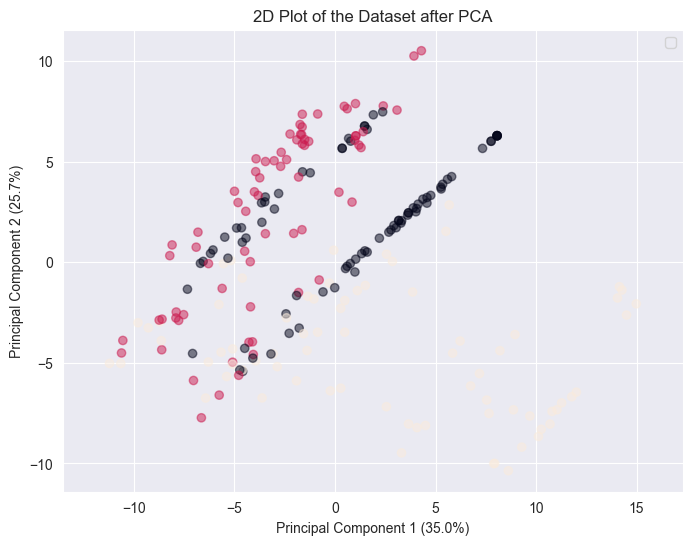

In [2]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"LettersIJL DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 4270.149129366722]
[2, 4162.600481889626]
[3, 4143.910723958546]
[4, 4137.938769105984]
[5, 4135.5027090947015]
[6, 4134.355544578969]
[7, 4133.768014445183]
[8, 4133.45137909443]
[9, 4133.274949958385]
[10, 4133.1742868645615]
[11, 4133.115805074122]
[12, 4133.081328151524]
[13, 4133.060747039156]
[14, 4133.048321870272]
[15, 4133.040739957315]
[16, 4133.036063908818]
[17, 4133.033148022492]
[18, 4133.031308236643]
[19, 4133.030132570628]
[20, 4133.02937087009]
[   0.         4133.02937087 4133.02937087]
[1, 4279.823436256933]
[2, 4165.38075723598]
[3, 4144.680707691871]
[4, 4138.155233674971]
[5, 4135.555445448437]
[6, 4134.359407229716]
[7, 4133.759130809578]
[8, 4133.441104200759]
[9, 4133.266440017584]
[10, 4133.168000987543]
[11, 4133.111407838721]
[12, 4133.0783412189685]
[13, 4133.058751280422]
[14, 4133.047000053683]
[15, 4133.039867701896]
[16, 4133.035488270956]
[17, 4133.03276699724]
[18, 4133.03105467377]
[19, 4133.029962592532]
[20, 4133.0292559059235]
[1.00000000e+00

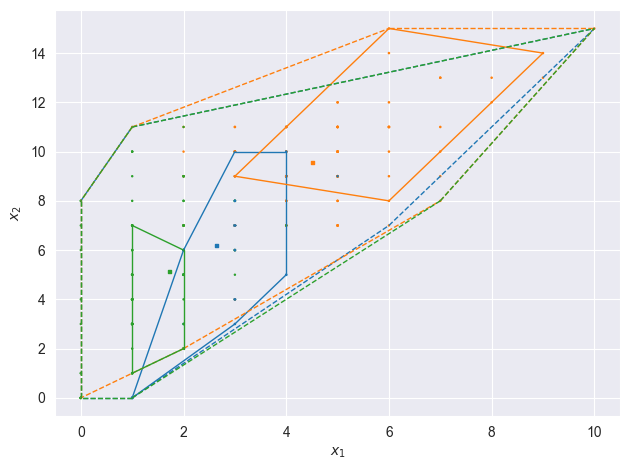

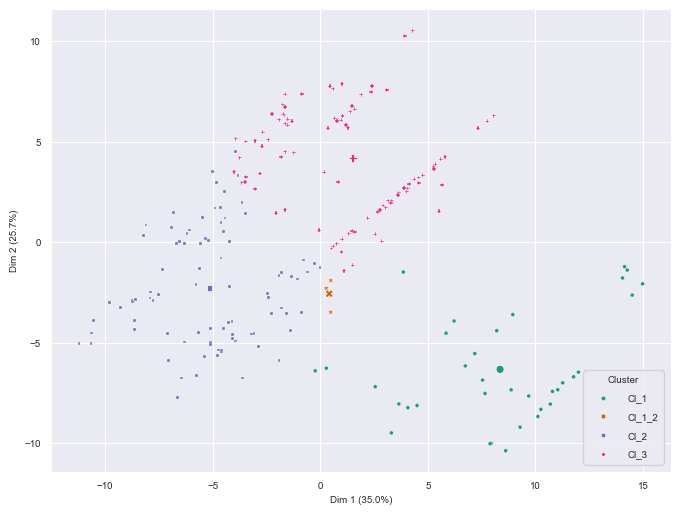

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.19515340295452677
Maximum Non-specificity value: 2.124303774387987
Minimum Non-specificity value: 0.552049674426644
Average Non-specificity value: 1.5229734778178217


In [4]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=5)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

Intitial noise weights: [0.07614778 0.05031021 0.05829965 0.06711865 0.07214235 0.04405359
 0.05993032 0.06803635 0.05447902 0.05037776 0.05413175 0.05272181
 0.09019315 0.06028949 0.070378   0.07139011]
Initial weight matrix: 
 [[9.53359258e-02 2.89939831e-02 1.47322102e-01 1.49811829e-01
  8.50211592e-02 6.20229553e-02 6.36532558e-02 1.69375109e-02
  6.60327203e-02 8.72841414e-02 4.36641345e-02 1.02402011e-02
  4.34704197e-02 5.11009007e-02 3.20684951e-02 1.70402668e-02]
 [7.70474807e-04 1.30245267e-01 3.44590925e-02 4.03853933e-02
  3.73417939e-02 3.43704204e-03 2.65715287e-01 3.79656035e-02
  2.82474044e-02 1.05168658e-02 2.64438756e-02 5.00029599e-02
  5.39803663e-02 1.05113050e-02 1.67609276e-03 2.68301176e-01]
 [1.95591316e-01 6.37960343e-02 1.50455388e-03 4.76139960e-02
  2.08626388e-04 2.02394446e-02 5.21405508e-02 1.19742917e-02
  2.14379456e-03 1.15725482e-01 1.31733413e-01 7.28071875e-03
  1.50197280e-01 3.59542475e-02 4.54701969e-03 1.59349231e-01]]
[1, 24.648435747505086]

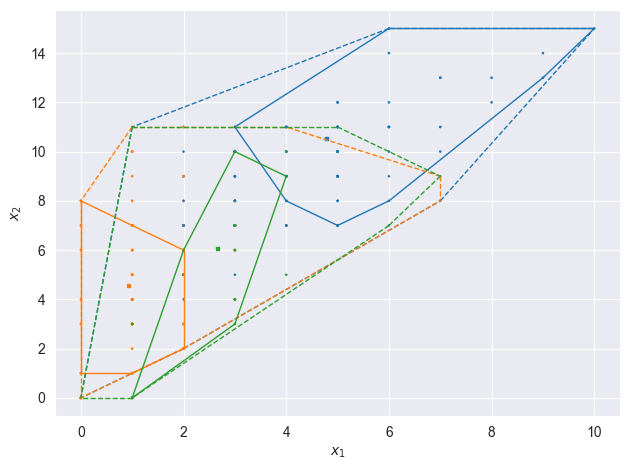

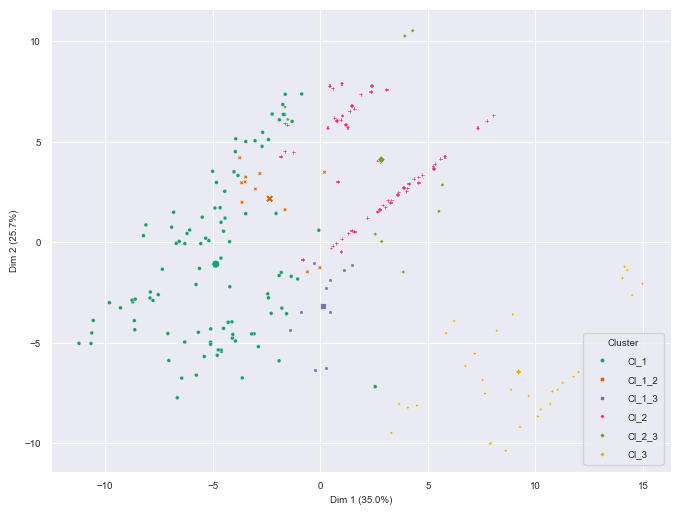

Weight matrix: 
 [[9.43640265e-02 2.75904932e-02 1.34127297e-01 1.26366566e-01
  8.90731157e-02 5.94032164e-02 6.31294562e-02 2.32211414e-02
  7.03057948e-02 5.78275997e-02 5.10038025e-02 2.12564047e-02
  5.39017850e-02 6.24453526e-02 3.61692676e-02 2.98146811e-02]
 [1.01983601e-02 1.03391850e-01 3.48394320e-02 4.26642075e-02
  4.04677160e-02 1.22773562e-02 2.41209363e-01 3.89241219e-02
  3.37915592e-02 1.35854685e-02 3.26418758e-02 4.92260122e-02
  5.66966262e-02 1.99687345e-02 9.74923369e-03 2.60368084e-01]
 [2.06535055e-01 2.74726332e-02 2.51716161e-04 3.18092705e-02
  9.03375323e-03 1.96085392e-02 1.92669861e-02 2.27391669e-02
  1.10297500e-02 1.00181773e-01 1.40624668e-01 1.71321585e-02
  1.64925389e-01 5.21142294e-02 1.74380730e-02 1.59836839e-01]]
Covariance Matrix 1: [2.88005437 4.53024125 2.34199796 2.54009514 2.69656813 4.66955488
 5.31090724 7.38192321 3.26316684 8.86340469 3.45752633 6.31345566
 2.3917771  1.55776419 9.10261638 2.17618077]
Covariance Matrix 2: [0.77072785 9

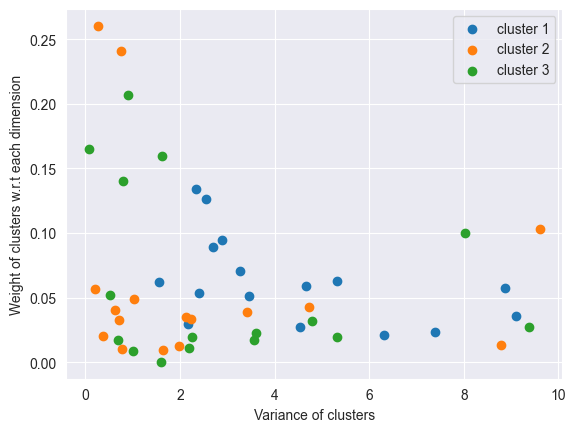

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.24867695986726007 - J value: 17.59729587191536
Maximum Non-specificity value: 2.5663393914985653
Minimum Non-specificity value: 0.5455232276045943
Average Non-specificity value: 1.5846977042654014


In [8]:
# Feature weighted ECM clustering
c = 3
# W = np.random.dirichlet(np.ones(X.shape[1]), c)
model = fwecm(x=X, c=c, beta=2, alpha=1, delta=100, ntrials=5, epsi=1e-3)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Non-specificity equation
![test.png](../assets/Non-specificity.png)